<a href="https://colab.research.google.com/github/Python-Financial-Analyst/pyfian_dev/blob/main/notebooks/fixed_income/03_curves.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>

# Curves

A bond yield curve represents the yields of bonds with different maturities, providing insight into how investors value short-term versus long-term debt. The shape of the curve is closely tied to macroeconomic conditions and market expectations.
For instance, an upward-sloping yield curve often signals economic growth: investors prefer short-term bonds (or cash equivalents) to fund projects and investments, pushing up short-term demand and yields. Conversely, an inverted yield curve may indicate economic uncertainty or a potential slowdown, as investors seek the safety of longer-term bonds, driving their yields lower relative to short-term bonds.
Different types of curves—such as spot curves, forward curves, and par curves—highlight various aspects of bond pricing and interest rate expectations. By analyzing these curves, investors and policymakers gain valuable insights into market sentiment and the broader economic outlook. Here are some examples of curves we can look at:

- **Credit Spread**: Difference in yield between bonds of similar maturity but different credit quality, typically corporate vs. Treasury.  

- **Forward Curve**: Shows forward rates, implied future interest rates for specific periods. 

- **Interpolated Curve**: Yields estimated between observed maturities using interpolation.  

- **Par Curve**: Coupon rates for bonds priced at par value across maturities.  

- **Spot Curve**: Yields on zero-coupon bonds for different maturities.  

## Curve Shapes

### Flat Curve

A flat yield curve occurs when short-term and long-term bond yields are nearly the same. This shape suggests uncertainty in the economy: investors do not strongly prefer one maturity over another, and the market is signaling that future growth and inflation expectations are unclear. Flat curves often appear during transitions in the business cycle, such as when the economy is shifting from expansion to slowdown.

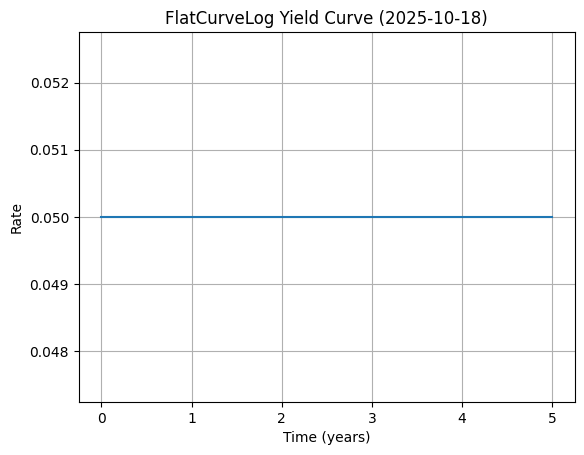

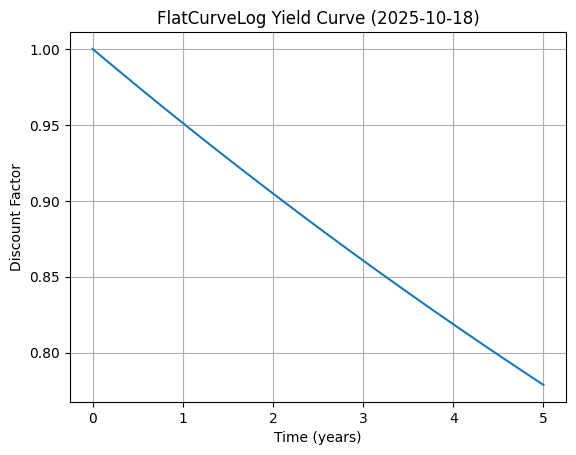

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from pyfian.yield_curves.spot_curve import SpotCurve
from pyfian.fixed_income.fixed_rate_bond import FixedRateBullet
from pyfian.yield_curves.flat_curve import FlatCurveLog

bonds = [
    FixedRateBullet(
        issue_dt="2025-01-01",
        maturity=maturity,
        cpn=5,   
        cpn_freq=2,          
        notional=100,        
        settlement_date="2025-10-18",
        price=100,           
    )
    for maturity in ["2026-01-01", "2027-01-01", "2028-01-01", "2029-01-01"]
]


flat_curve = FlatCurveLog(log_rate=0.05, curve_date="2025-10-18")

flat_curve.plot_curve(t_max= 5, n=1000, kind = "rate")
flat_curve.plot_curve(t_max= 5, n=1000, kind = "discount")



### Upward Sloping Curve

An upward-sloping yield curve is the most common shape, where long-term bonds offer higher yields than short-term bonds. This reflects expectations of economic growth and potentially higher inflation in the future, leading investors to demand greater compensation for holding debt over longer horizons. It signals confidence in the economy, as short-term borrowing costs remain relatively low while long-term rates rise with stronger growth outlooks.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyfian.yield_curves.spot_curve import SpotCurve
from pyfian.fixed_income.fixed_rate_bond import FixedRateBullet

bonds = [
    FixedRateBullet(
        issue_dt="2025-01-01",
        maturity=maturity,
        cpn=5,   
        cpn_freq=2,          
        notional=100,        
        settlement_date="2025-10-18",
        price=100,           
    )
    for maturity in ["2026-01-01", "2027-01-01", "2028-01-01", "2029-01-01"]
]


upward_sloping_curve = SpotCurve(curve_date=bonds[0].get_settlement_date(), bonds=bonds)

### Inverted Yield Curve
An inverted yield curve occurs when short-term bond yields are higher than long-term yields. This unusual shape often signals investor concern about the economy, as demand for long-term bonds increases to lock in safer, stable returns. Inverted curves are commonly viewed as a warning of potential economic slowdown or recession, reflecting expectations of lower growth and inflation in the future.

## Important Concepts


### Logarithm of a Curve

Taking the logarithm of a yield curve is a common technique to smooth out fluctuations and highlight relative differences between yields across maturities. This can make trends easier to analyze and help in fitting models to observed data.

### AER (Annual Equivalent Rate)

The Annual Equivalent Rate (AER) represents the annualized interest rate that accounts for compounding over the year. It allows investors to compare returns on different investment products on a consistent annual basis, regardless of how frequently interest is compounded (monthly, quarterly, etc.).

The formula for AER is:

$$
\text{AER} = \left(1 + \frac{i}{n}\right)^n - 1
$$

where:  
- \(i\) = nominal interest rate  
- \(n\) = number of compounding periods per year  

Using AER, investors can directly compare accounts or bonds that compound at different frequencies, ensuring a like-for-like comparison.

### BEY (Bond Equivalent Yield)

The Bond Equivalent Yield (BEY) converts the yield on a bond, often quoted on a discount or semi-annual basis, into an annualized yield that is comparable to standard coupon-bearing bonds. This is particularly useful for short-term securities like Treasury bills or zero-coupon bonds.

For a discount bond (e.g., a T-bill), BEY is calculated as:

$$
\text{BEY} = \frac{F - P}{P} \cdot \frac{365}{t}
$$

where:  
- \(F\) = face value of the bond  
- \(P\) = purchase price  
- \(t\) = days to maturity  

For a semi-annual coupon bond, BEY can also be expressed as:

$$
\text{BEY} = 2 \left[ \left(1 + \frac{YTM_{\text{semi-annual}}}{2}\right)^2 - 1 \right]
$$

Using BEY allows investors to compare yields of bonds with different maturities or coupon structures on a consistent annual basis, making it easier to assess relative value across instruments.


In [ ]:
from pyfian.yield_curves.flat_curve import FlatCurveLog

curve_log = FlatCurveLog(0.05, "2020-01-01")